In [ ]:
import sys
sys.path.append('/home/lpyras/utah/mute_fork/mute/')
sys.path.append('/home/lpyras/.local/lib/python3.11/site-packages')
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import numpy as np

## Load the Tensor from the File

The tensor can be loaded from a specific file by passing the ``file_name`` argument into the function. If no file name is given, the function will search through the data files for a file name that matches the set global propagation constants. With the constants set above, MUTE will look for a file in the ``"mute/data/survival_probabilities/"`` directory called ``rock_2.65_100000_Survival_Probabilities.txt``, where ``2.65`` is the density in gcm$^{-3}$, and ``100000`` is the number of muons, indicating the statistics of the file.

In [1]:
survival_file='/data/user/lpyras/mute_output/survival_probabilities/ice_0.93_100_Survival_Probabilities.txt'
file = open(survival_file, "r")
n_lines = len(file.read().splitlines())
file.close()

if n_lines != 121 * 10 * 121:
    raise ValueError(f"Survival probabilities file does not match the expected number of lines: {n_lines} != {121 * 10 * 121}")

survival_probability_tensor = np.reshape(
	np.loadtxt(survival_file)[:, 3],
	(121, 10, 121)
)

print('Survival probabilities tensor shape:', survival_probability_tensor.shape)
_E_BINS = np.logspace(1.9, 14, 122)  # Bin edges in MeV
_E_WIDTHS = np.diff(_E_BINS)  # Bin widths
ENERGIES = np.sqrt(_E_BINS[1:] * _E_BINS[:-1])  # Bin centers

angles_lin_cos_theta = np.arccos(np.linspace(1,0,11))
angles_lin_cos_theta_low = angles_lin_cos_theta[:-1]
angles_lin_cos_theta_high = angles_lin_cos_theta[1:]
angles_lin_cos_theta_center = np.arccos((np.cos(angles_lin_cos_theta_high)+np.cos(angles_lin_cos_theta_low))/2)
angles_lin_cos_theta_center_deg=np.rad2deg(angles_lin_cos_theta_center)

vertical_depth = 2. * (0.93/0.997) 
print('Vertical depth:', vertical_depth)

slant_depths = vertical_depth / np.cos(angles_lin_cos_theta_center) #vertical_depth is at cos(zenith=0) = 1
angles = np.degrees(np.arccos(vertical_depth / slant_depths))
_X_MIN = slant_depths[0]
_X_MAX = slant_depths[-1]

ANGLES_FOR_S_FLUXES = angles_lin_cos_theta_center_deg

NameError: name 'np' is not defined

## Plot the Survival Probability Matrix

The survival probability tensor is a three-dimensional NumPy array with the following axes:

1. Surface energy
2. Slant depth or zenith angle
3. Underground energy

vmin: 0.01
vmax: 0.49


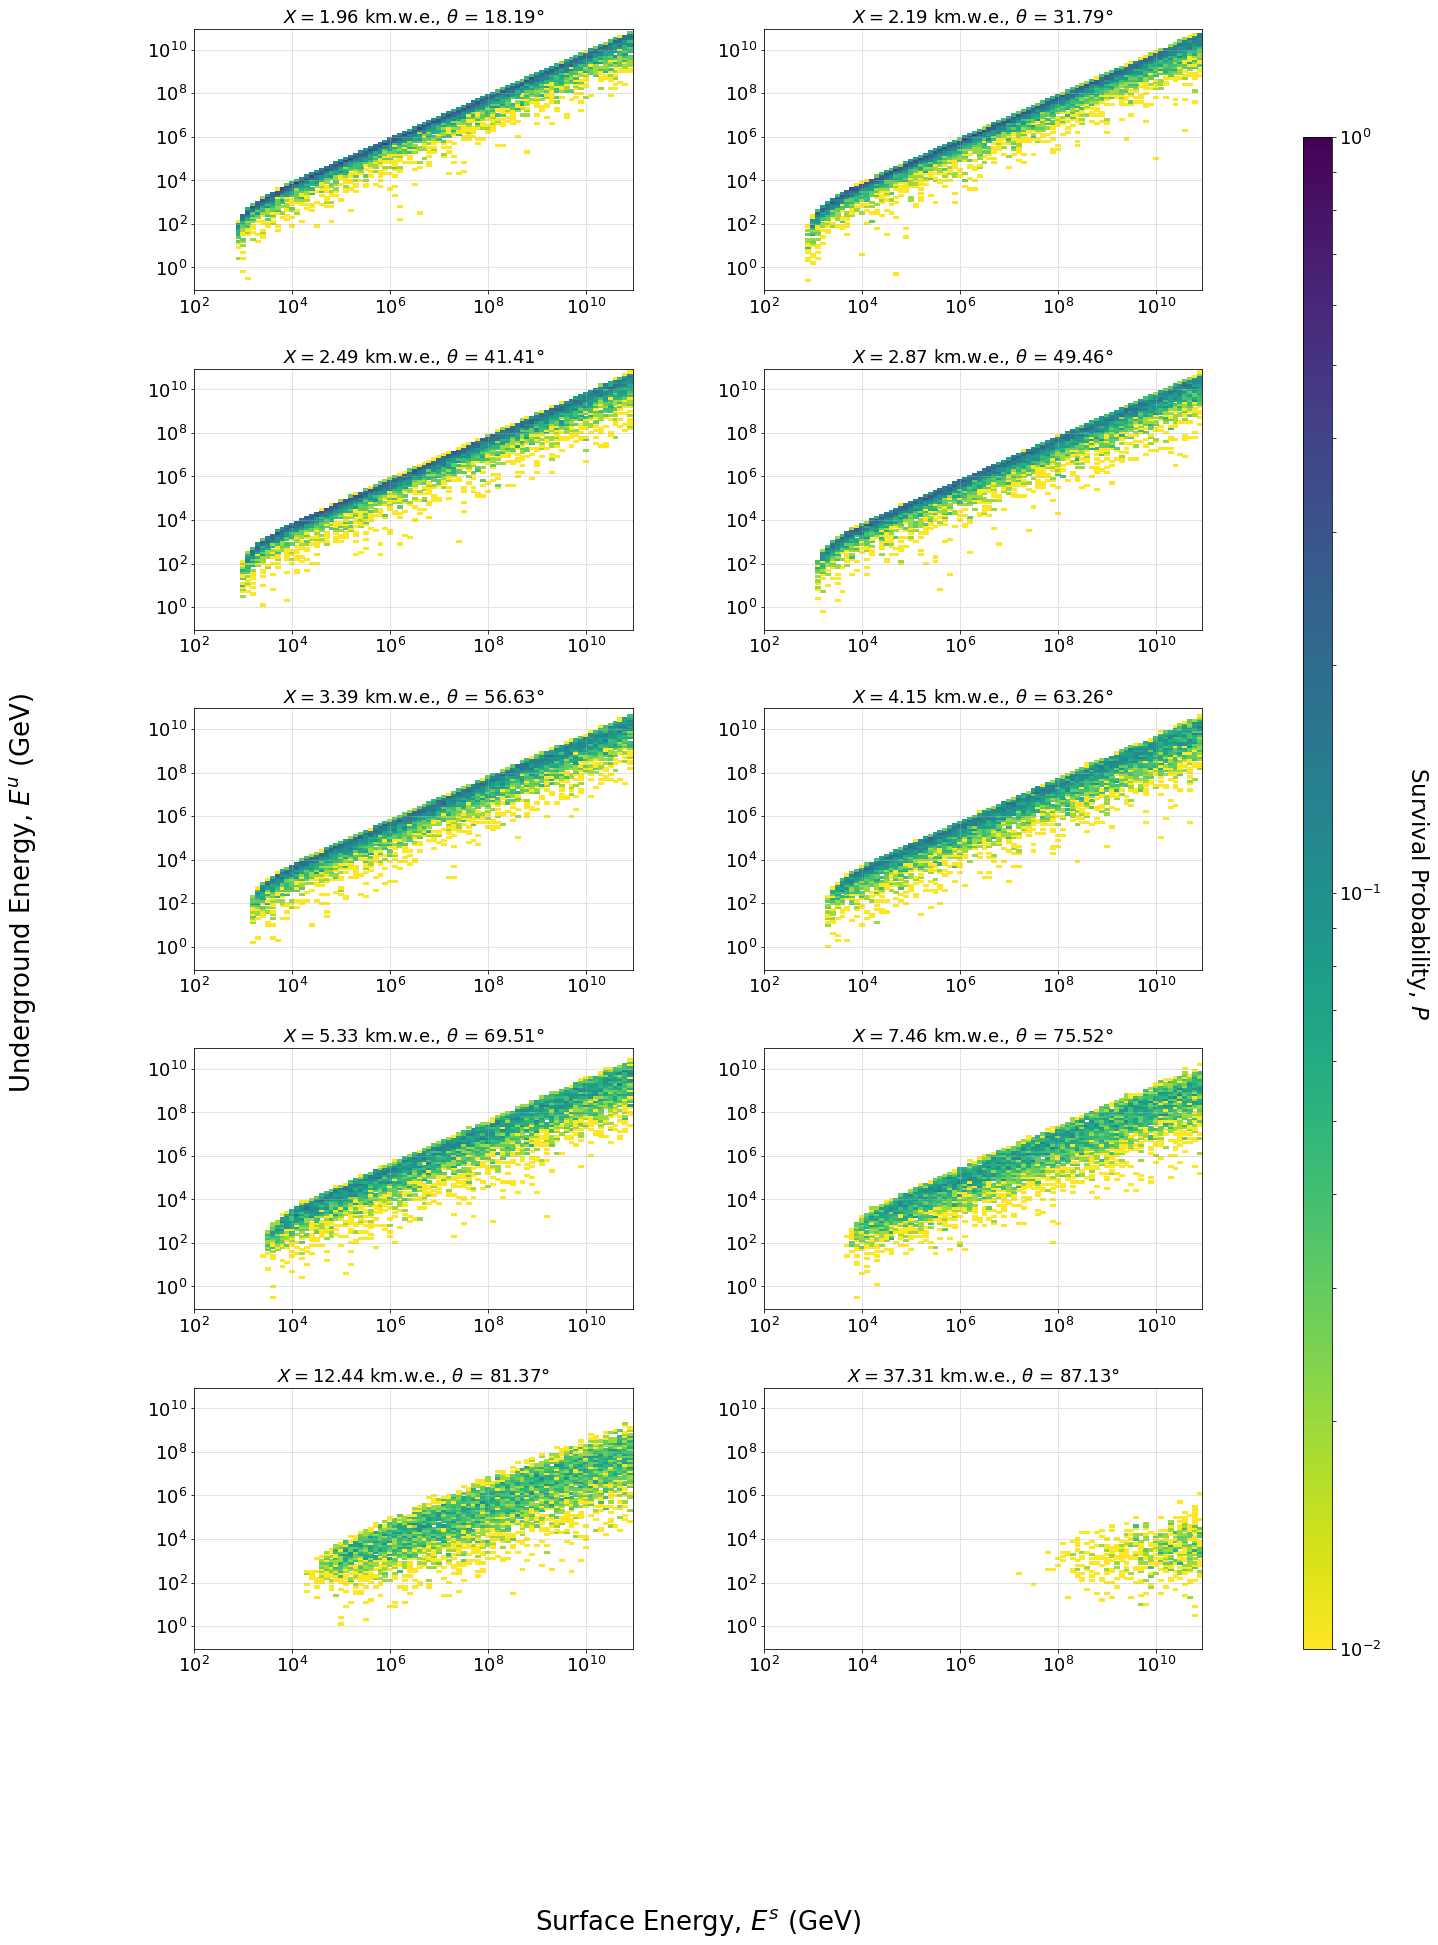

In [ ]:
# Define common normalization across all plots
vmin = np.min(survival_probability_tensor[survival_probability_tensor > 0])  # Ensure positive values for LogNorm
vmax = np.max(survival_probability_tensor)
print('vmin:', vmin)
print('vmax:', vmax)
#norm = Normalize(vmin=0.0, vmax=1, clip=True)  # Clip values outside range
norm = LogNorm(vmin=vmin, vmax=1)  # Clip values outside range


X, Y = np.meshgrid(ENERGIES / 1e3, ENERGIES / 1e3)
fig, axes = plt.subplots(5, 2, figsize=(20, 30), sharex=False, sharey=False)
axes = axes.flatten()

# Iterate over slant depths
for slant_depth_index in range(len(slant_depths)):
    ax = axes[slant_depth_index]
    im = ax.pcolormesh(X, Y, survival_probability_tensor[:, slant_depth_index, :].T, norm=norm, cmap="viridis_r", shading="auto")

    ax.set_title(rf"$X=${slant_depths[slant_depth_index]:.2f} km.w.e., $\theta$ = {angles[slant_depth_index]:.2f}$\degree$", fontsize=18)
    ax.tick_params(axis="both", which="major", labelsize=18)
    ax.yaxis.offsetText.set_fontsize(16)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.set_xlim([1e2, np.max(ENERGIES) / 1e3])


# Adjust layout to create extra space
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.85, top=0.9, wspace=0.3, hspace=0.3)

# Single x and y labels with more space
fig.text(0.5, 0.02, r"Surface Energy, $E^s$ (GeV)", ha="center", fontsize=26)  # Move x-label lower
fig.text(0.02, 0.5, r"Underground Energy, $E^u$ (GeV)", va="center", rotation="vertical", fontsize=26)  # Move y-label further left

# Add single colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position as needed
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Survival Probability, $P$", fontsize=23, rotation=270, labelpad=50)  # Increase label spacing
cbar.ax.tick_params(axis="both", which="major", labelsize=18)

plt.show()



: 